In [1]:

# imports
import os
import sys
import types
import json

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = fig_dpi
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  pio.renderers.default = "notebook_connected"
except Exception:
  pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass



# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
if r'/Users/davoodwadi/MLCourse/davoodwadi.github.io/code':
  os.chdir(r'/Users/davoodwadi/MLCourse/davoodwadi.github.io/code')

# reset state
%reset

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v
  
  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define


/var/folders/jv/ppbxly7j7vzgcr8sdv78s2hr0000gn/T/ipykernel_39607/4123388575.py:20: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"/Users/davoodwadi/mambaforge/lib/python3.10/importlib/_bootstrap.py": 1687560475.899881, "/Users/davoodwadi/mambaforge/lib/python3.10/importlib/_bootstrap_external.py": 1687560475.905339, "/Users/davoodwadi/mambaforge/lib/python3.10/codecs.py": 1687560473.470777, "/Users/davoodwadi/mambaforge/lib/python3.10/encodings/aliases.py": 1687560474.989399, "/Users/davoodwadi/mambaforge/lib/python3.10/encodings/__init__.py": 1687560474.985129, "/Users/davoodwadi/mambaforge/lib/python3.10/encodings/utf_8.py": 1687560475.43757, "/Users/davoodwadi/mambaforge/lib/python3.10/abc.py": 1687560473.346976, "/Users/davoodwadi/mambaforge/lib/python3.10/io.py": 1687560473.627098, "/Users/davoodwadi/mambaforge/lib/python3.10/stat.py": 1687560473.825673, "/Users/davoodwadi/mambaforge/lib/python3.10/_collections_abc.py": 1687560473.307906, "/Users/davoodwadi/mambaforge/lib/python3.10/genericpath.py": 1687560473.574852, "/Users/davoodwadi/mambaforge/lib/python3.10/posixpath.py": 1687560473.717288, "/Users/da

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve

# Generate a random 2-class classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=5, n_classes=2, random_state=42)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

Text(0, 0.5, 'Recall')

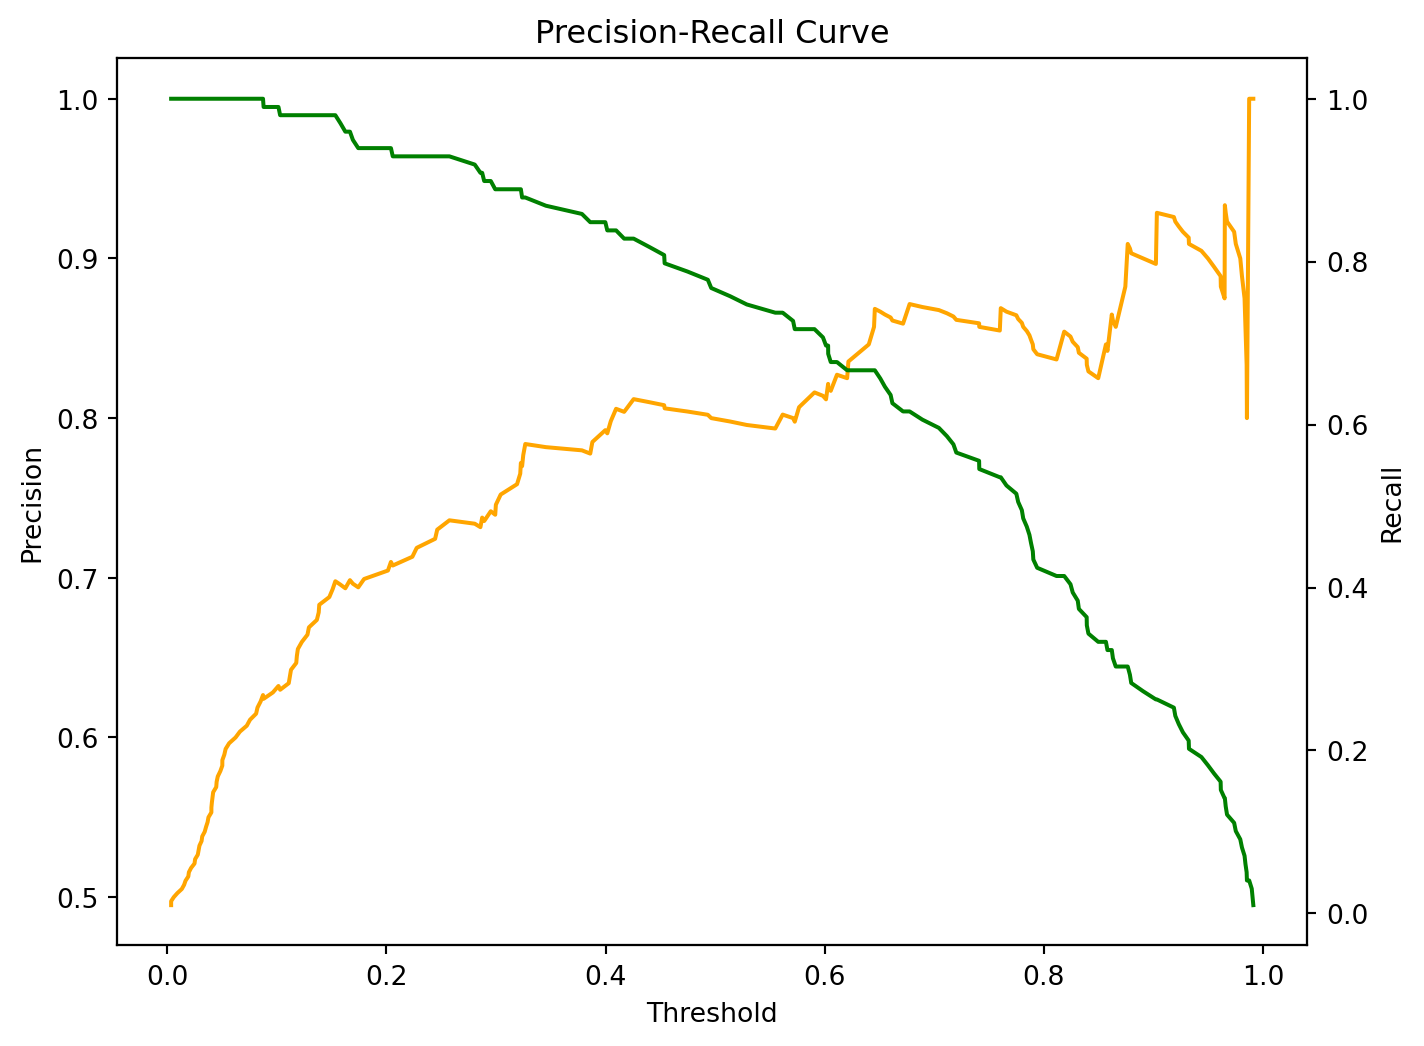

In [3]:
# Predict probabilities for the test set
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

# Plot the precision-recall curve
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(thresholds, precision[:-1], label = "Precision", color='orange')
ax.set_xlabel('Threshold')
ax.set_ylabel('Precision')
ax.set_title('Precision-Recall Curve')
ax2 = ax.twinx()
ax2.plot(thresholds, recall[:-1], label = "Recall", color='green')
ax2.set_ylabel('Recall')